## Step 1: Importing and Understading the data

In [1]:
#importing the necessary libraries

import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# supressing the warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the data

bike_share_data = pd.read_csv("day.csv")

In [3]:
bike_share_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#checking the shape of the data

bike_share_data.shape

(730, 16)

In [5]:
bike_share_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# checking the information on the type of variables
bike_share_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#converting dates to date_time format
bike_share_data['dteday'] = pd.to_datetime(bike_share_data['dteday'], format = 'mixed')

In [8]:
bike_share_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Data Dictionary - For easier reference

- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered **(target variable)**

### Step 2: Visualising the data

After the completion of reading of data the broad inferences can be found from the data visualisations mostly the multicollinearity and the relationship of different variables with the target variable, cnt in our case.

First, we will check for trends in the data based on time as the data is available for each day

In [9]:
# Plotting the time-series
time_series_data = bike_share_data[['dteday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered','cnt']]

In [10]:
time_series_data

,dteday,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...
725,2019-12-27,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,2019-12-28,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,2019-12-29,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,2019-12-30,10.489153,11.58500,48.3333,23.500518,364,1432,1796


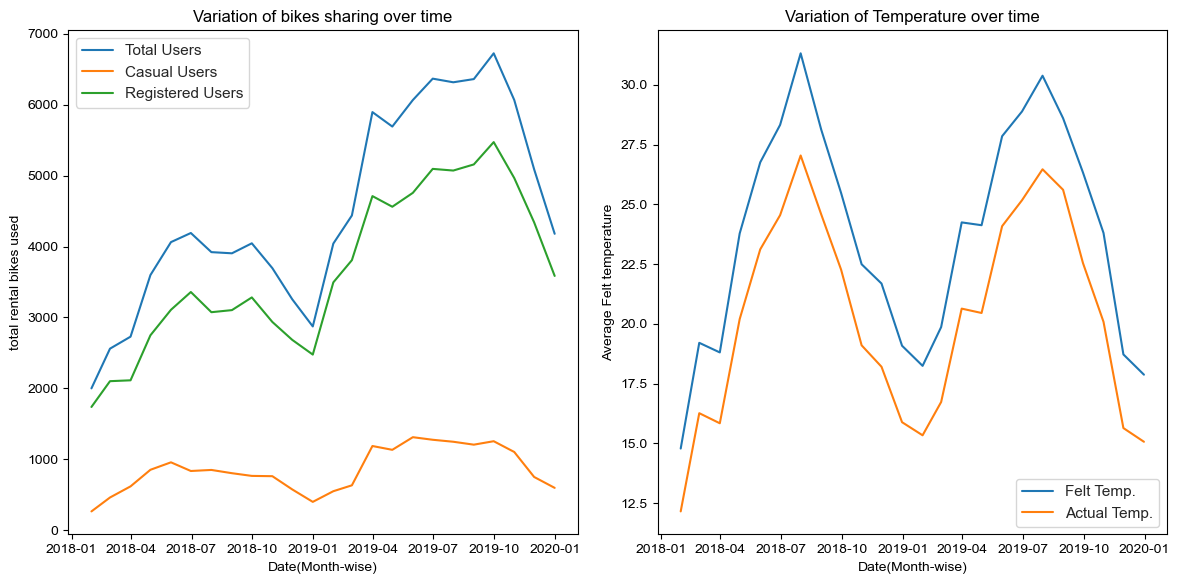

In [11]:
# setting the index of the data to dteday
time_series_data.set_index('dteday', inplace = True) 

# When checked after plotting with the daily data, no insights/trends were visible. Hence, averaging
# is required over monthly time period.
time_series_data_resampled = time_series_data.resample('M').mean()

#plotting two sub-plots side by side
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))

# Plotting the first sub-plot
sns.set(style = 'whitegrid') # for better readability
sns.lineplot(data = time_series_data_resampled, x = time_series_data_resampled.index, y = 'cnt', ax = axes[0], label = 'Total Users')
sns.lineplot(data = time_series_data_resampled, x = time_series_data_resampled.index, y = 'casual', ax = axes[0], label = 'Casual Users')
sns.lineplot(data = time_series_data_resampled, x = time_series_data_resampled.index, y = 'registered', ax = axes[0], label = 'Registered Users')

# Adding labels and titles to first plot
axes[0].set_xlabel('Date(Month-wise)')
axes[0].set_ylabel('total rental bikes used')
axes[0].set_title('Variation of bikes sharing over time')


# Plotting the second sub-plot
sns.set(style = 'whitegrid') # for better readability
sns.lineplot(data = time_series_data_resampled, x = time_series_data_resampled.index, y = 'atemp', ax = axes[1], label = 'Felt Temp.')
sns.lineplot(data = time_series_data_resampled, x = time_series_data_resampled.index, y = 'temp', ax = axes[1], label = 'Actual Temp.')


# Adding labels and titles to first plot
axes[1].set_xlabel('Date(Month-wise)')
axes[1].set_ylabel('Average Felt temperature')
axes[1].set_title('Variation of Temperature over time')

#Adjust the spacing
plt.tight_layout()
plt.legend()
plt.show()

#### INSIGHTS:

It is clear from the above plots that as the temperature reduces to reach minimum in January Month, the demand for the bike sharing also reduces.

Hence, temperature is a critical variable which is affecting the number of users

Additionally, the rise and fall in the demand is strongly correlated with the temperature.

Hence, in hotter weather riders tend to share more bikes compared to colder months|

#### 2.1 Visualizing Numerical Data

In [12]:
# A lot more insights can be generated from the pairplot between the numerical variables

num_var = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

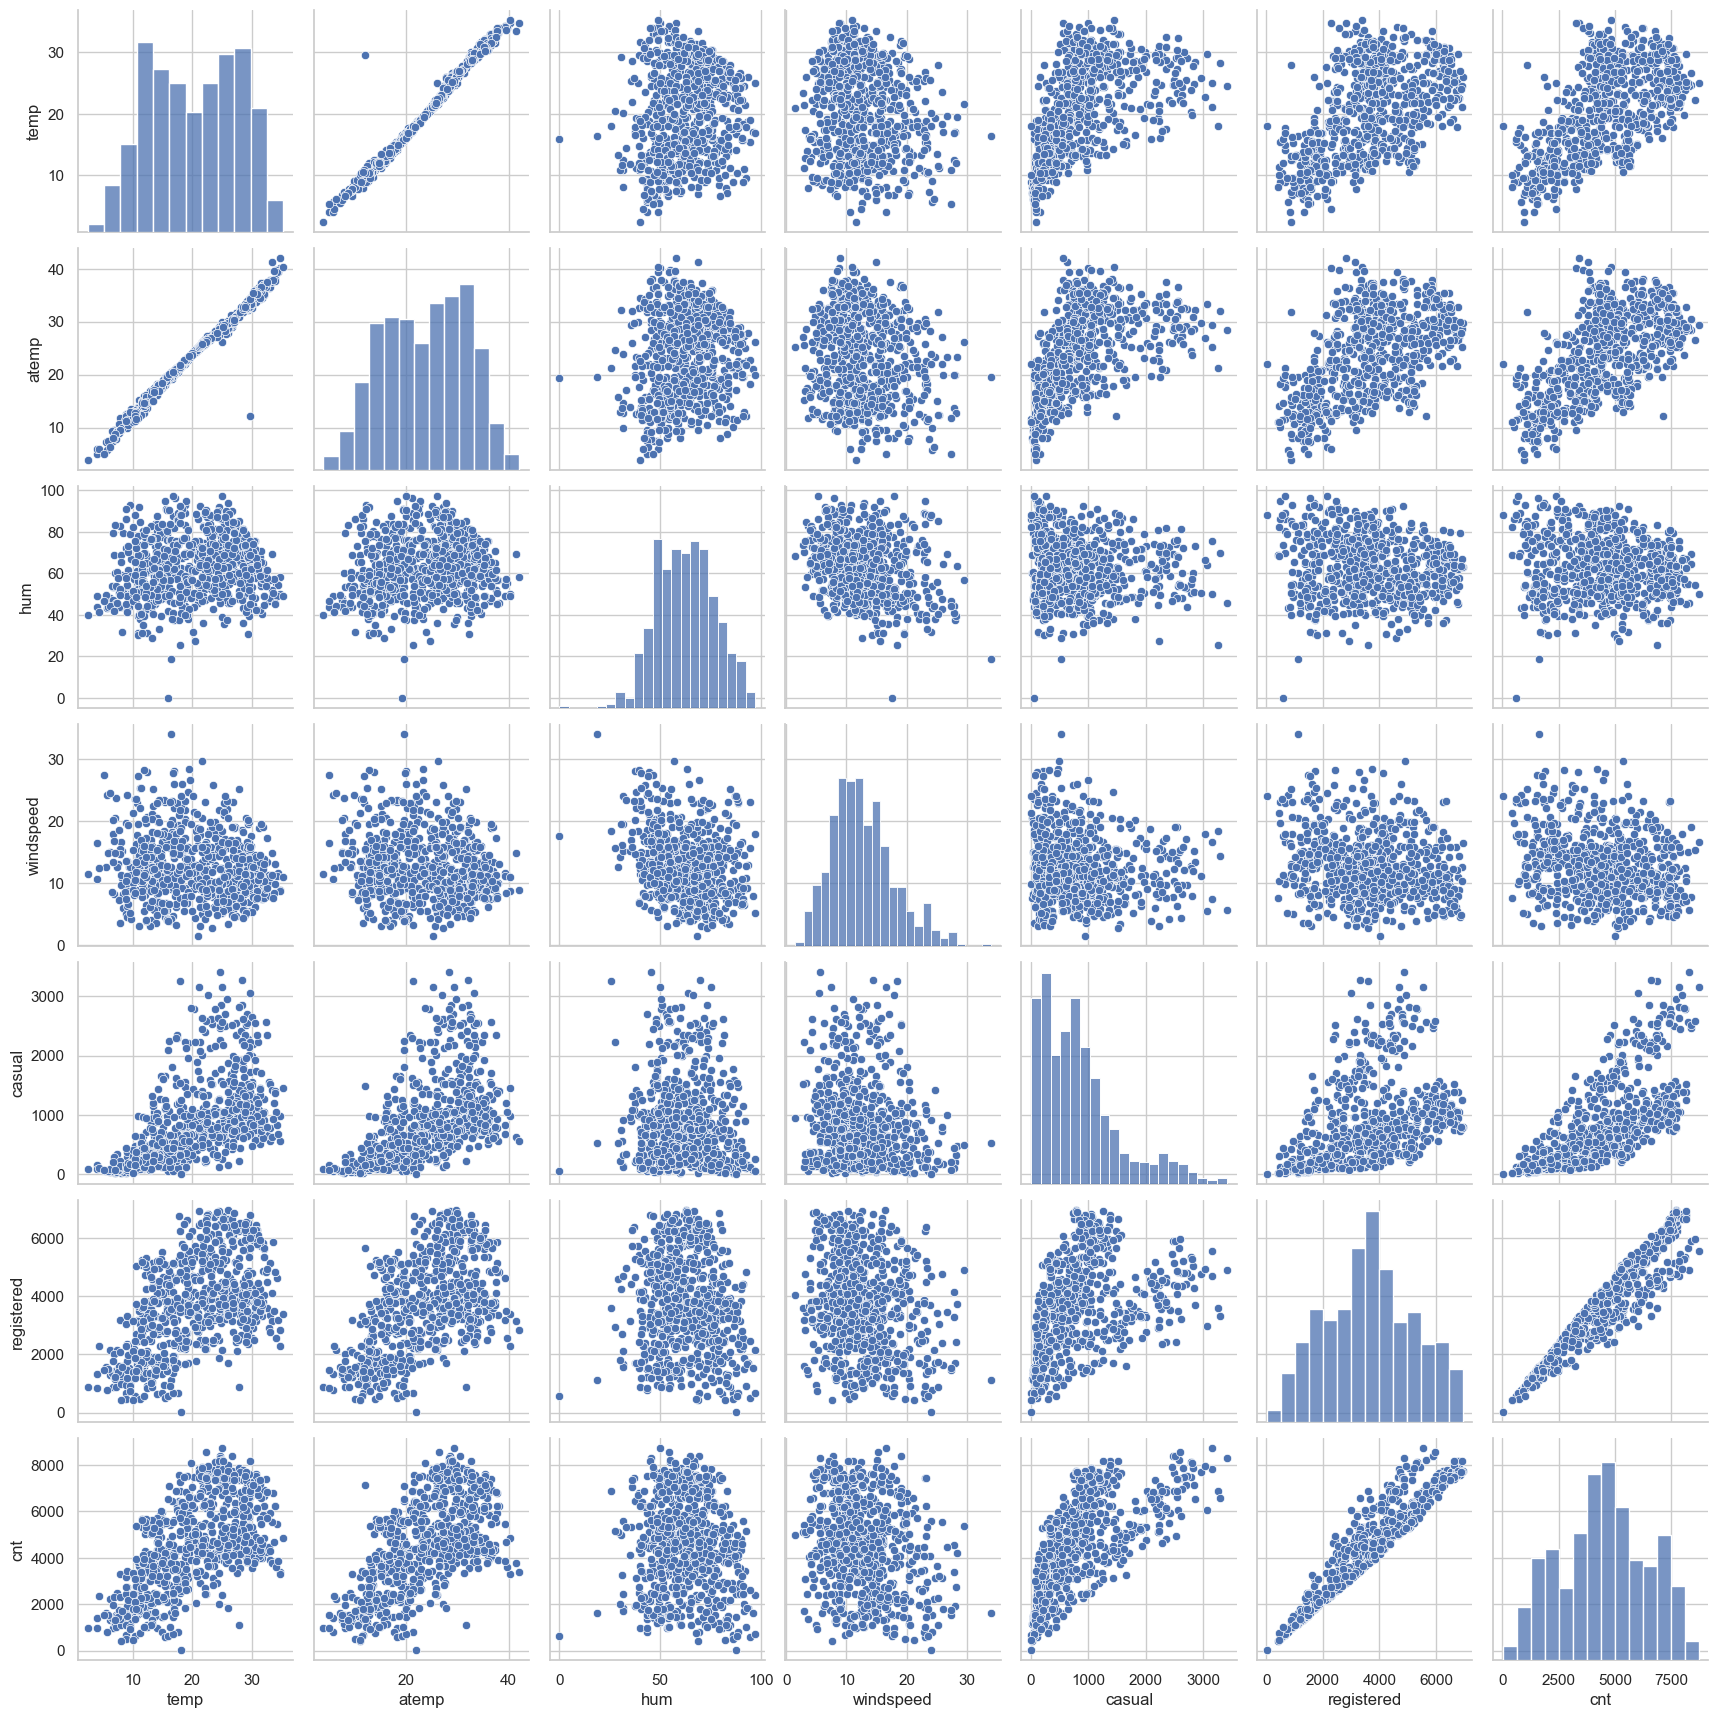

In [13]:
# plotting the pairplots

sns.pairplot(bike_share_data[num_var])
plt.show()   

#### Insights from above Pairplot


_Strong Collinearity and Relationship:_

- Between temp and atemp (Understandable as one is extension of another)
- Between Registered number of users and total count (meaning a large chunk of total users are registered and affect the total count)


_Weak Relationship:_

- Between Temperature and count (target variable is count which seems to increase with temperature - both actual and felt)

_No Relationships/Patterns:_
- The humidity and wind-speed are scattered uniformly and no immediate trend is visible with the total count (cnt)

#### 2.2 Visualising Categorical Data

Apart from the analysis of numerical variables, the next logical step is to generate plots (mainly box plots) for the categorical variables in order to identify trends

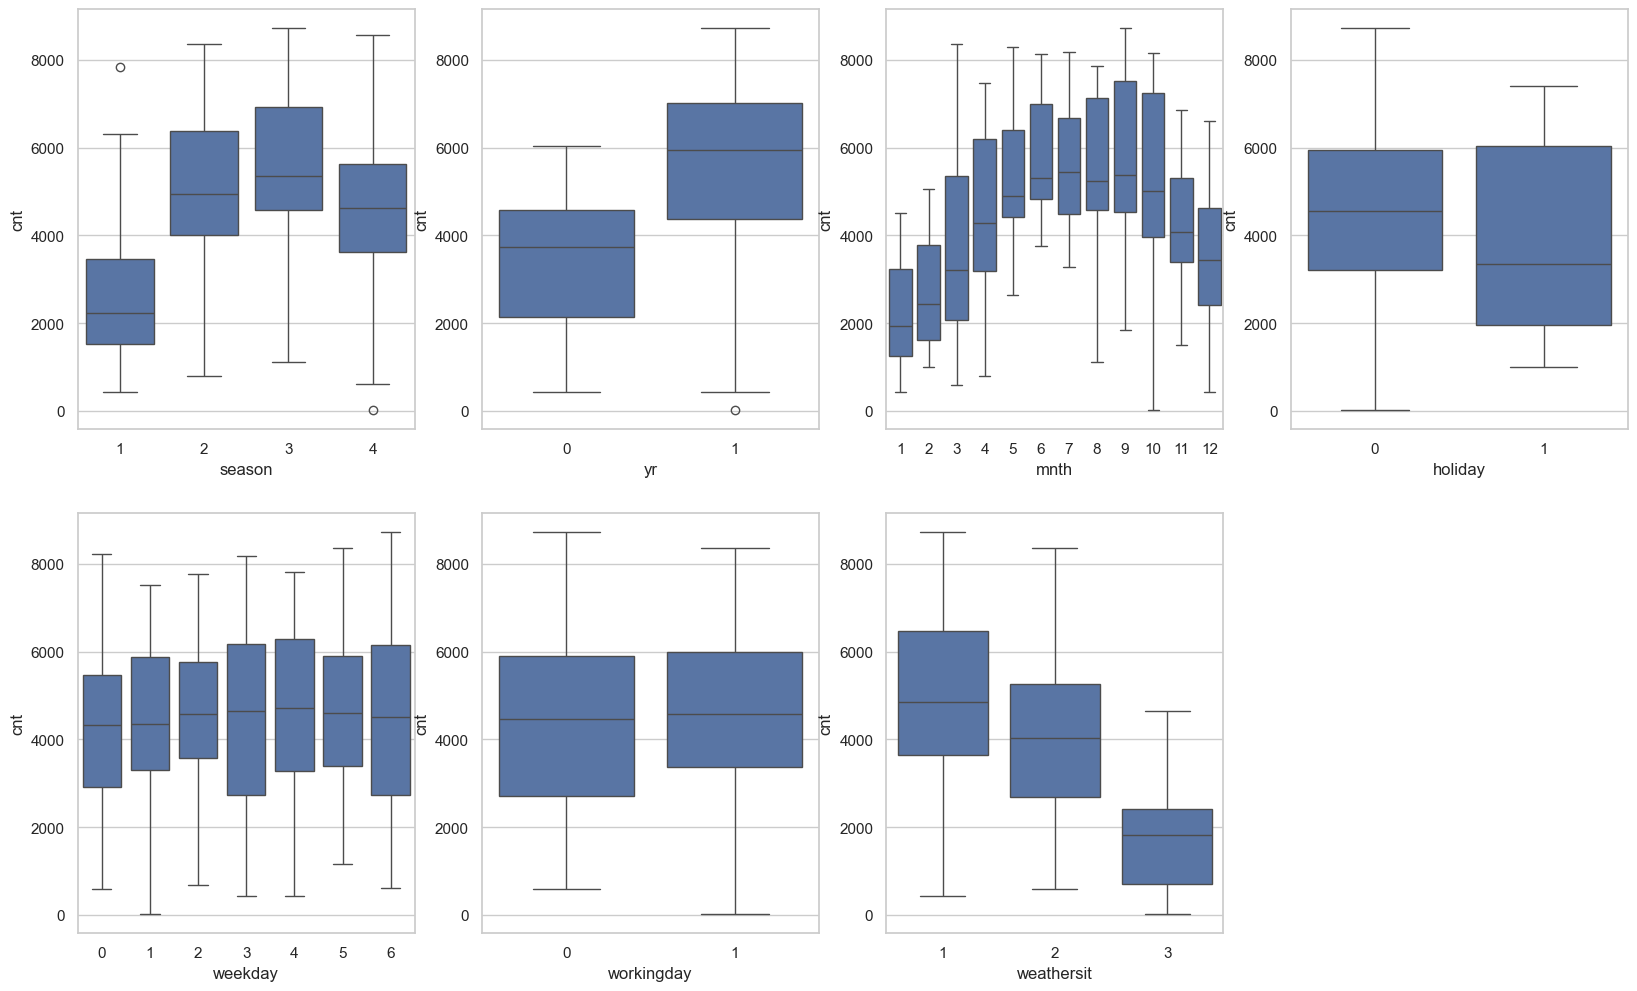

In [14]:
# specifying the size of the plot
plt.figure(figsize = (20,12))

# plot-1
plt.subplot(2,4,1)
sns.boxplot(x ='season' , y = 'cnt', data = bike_share_data)

# plot-2
plt.subplot(2,4,2)
sns.boxplot(x ='yr' , y = 'cnt', data = bike_share_data)

# plot-3
plt.subplot(2,4,3)
sns.boxplot(x ='mnth' , y = 'cnt', data = bike_share_data)

# plot-4
plt.subplot(2,4,4)
sns.boxplot(x ='holiday' , y = 'cnt', data = bike_share_data)

# plot-5
plt.subplot(2,4,5)
sns.boxplot(x ='weekday' , y = 'cnt', data = bike_share_data)

# plot-6
plt.subplot(2,4,6)
sns.boxplot(x ='workingday' , y = 'cnt', data = bike_share_data)

# plot-7
plt.subplot(2,4,7)
sns.boxplot(x ='weathersit' , y = 'cnt', data = bike_share_data)

plt.show()


#### Insights from the above visualization

- For seasons (2 & 3) i.e, summer and fall the demand and is more for shared bikes and the same reduces for spring and winter seasons (1 & 2) - This insight is also evident from the time-series plot.
- Compared year-wise, the bike-shares quantity increased from 2018 to 2019.
- When viewing the **month-wise data**, it is mirroring the seasons data trends.
- Interestingly, for **holidays** the bike sharing demand is less than non-holidays meaning the service is used mostly by employed people.
- In line with the above statement, the bike sharing demand lower limit is also higher for working-days.
- For the **weather** variable, as it changes from clear to light rain to thunderstorm the demand for the bike sharing reduces. 

## Step 3: Data Preparation

- For the weathersit variable, the different entries are assigned numbers from 1 to 4.
- This can be inferred by the model as having some ranking. Hence it is important to convert it into proper categorical variables

In [15]:
# defining a dictionary map for the weathersit variable.
# This is done to ensure that there is no order understood by the model in the variables 1, 2, 3, and 4.

weathersit_dict = {1: 'clear', 2: 'clouds', 3: 'light_rain', 4: 'heavy_rain'}


In [16]:
# mapping the dictionary on to the bike_share_data

bike_share_data['weathersit'] = bike_share_data['weathersit'].map(weathersit_dict)

In [17]:
# re-checking the data
bike_share_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,clouds,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,clouds,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Now the weathersit variable is having 4 levels. Note - no entry is having 4 as entry. To enable the suitability with the model it is required to convert the weathersit variable to dummy variable.

In [18]:
# getting the dummy variables
weather_dummy = pd.get_dummies(bike_share_data['weathersit'])

In [19]:
# checking the dataset dummy variables
weather_dummy.head()

,clear,clouds,light_rain
0,False,True,False
1,False,True,False
2,True,False,False
3,True,False,False
4,True,False,False


In [20]:
## converting trues and falses to 0 and 1
weather_dummy = pd.get_dummies(bike_share_data['weathersit'], dtype = int)
weather_dummy.head()

,clear,clouds,light_rain
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


Here we can drop one of the columns as the remaining two can define that column.
For example:

- If light_rain is True --> it can be explained by both clear and cloud being 0

In [21]:
weather_dummy = pd.get_dummies(bike_share_data['weathersit'], dtype = int, drop_first = True)
weather_dummy.head()

,clouds,light_rain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [22]:
# the next step is to add the dummy variables data to the original dataset
bike_share_data = pd.concat([bike_share_data, weather_dummy], axis = 1)
bike_share_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,clouds,light_rain
0,1,2018-01-01,1,0,1,0,6,0,clouds,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0
1,2,2018-02-01,1,0,1,0,0,0,clouds,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0
2,3,2018-03-01,1,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0
3,4,2018-04-01,1,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0
4,5,2018-05-01,1,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,1,1,12,0,4,1,clouds,10.420847,11.33210,65.2917,23.458911,247,1867,2114,1,0
726,727,2019-12-28,1,1,12,0,5,1,clouds,10.386653,12.75230,59.0000,10.416557,644,2451,3095,1,0
727,728,2019-12-29,1,1,12,0,6,0,clouds,10.386653,12.12000,75.2917,8.333661,159,1182,1341,1,0
728,729,2019-12-30,1,1,12,0,0,0,clear,10.489153,11.58500,48.3333,23.500518,364,1432,1796,0,0


In [23]:
#dropping the weathersit column
bike_share_data.drop(columns = ['weathersit'], inplace = True)

In [24]:
bike_share_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,clouds,light_rain
0,1,2018-01-01,1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0
1,2,2018-02-01,1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0
2,3,2018-03-01,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0
3,4,2018-04-01,1,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0
4,5,2018-05-01,1,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,1,1,12,0,4,1,10.420847,11.33210,65.2917,23.458911,247,1867,2114,1,0
726,727,2019-12-28,1,1,12,0,5,1,10.386653,12.75230,59.0000,10.416557,644,2451,3095,1,0
727,728,2019-12-29,1,1,12,0,6,0,10.386653,12.12000,75.2917,8.333661,159,1182,1341,1,0
728,729,2019-12-30,1,1,12,0,0,0,10.489153,11.58500,48.3333,23.500518,364,1432,1796,0,0


Converting the dates columns to numerical value will require excessive manipulation and hence dropping the same is a viable option. Additinally, instant also does not add any value to the data and can also be dropped.

In [25]:
bike_share_data.drop(columns = ['dteday', 'instant'], inplace = True)

In [26]:
bike_share_data

,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,clouds,light_rain
0,1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0
1,1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0
2,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0
3,1,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0
4,1,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,10.420847,11.33210,65.2917,23.458911,247,1867,2114,1,0
726,1,1,12,0,5,1,10.386653,12.75230,59.0000,10.416557,644,2451,3095,1,0
727,1,1,12,0,6,0,10.386653,12.12000,75.2917,8.333661,159,1182,1341,1,0
728,1,1,12,0,0,0,10.489153,11.58500,48.3333,23.500518,364,1432,1796,0,0


## Step 4 : Splitting the data into training and test data sets

The first step of performing the linear regression is doing the train and test split

In [27]:
from sklearn.model_selection import train_test_split
#for reproducibility and consistency
np.random.seed(0)
df_train, df_test = train_test_split(bike_share_data, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the features

Prior to proceeding further with model fitting, it is necessary to perform re-scaling of all the features.

Technique to be used - MinMax Scaling

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [29]:
# variables on which the min-max scaler is to be applied

num_vars = ['season', 'mnth', 'weekday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

We used fit_transform in the above step wherein the scaler first learn the parameters from the data and also applies the same with the transform. We cannot use fit_transform directly on the test set

In [30]:
# looking at transformed data
df_train.head()

,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,clouds,light_rain
653,1.000000,1,0.818182,0,0.333333,1,0.509887,0.501133,0.575354,0.300794,0.280402,0.951776,0.864243,0,0
576,0.666667,1,0.545455,0,0.333333,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,0,0
426,0.000000,1,0.181818,0,1.000000,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,1,0
728,0.000000,1,1.000000,0,0.000000,0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,0,0
482,0.333333,1,0.272727,0,1.000000,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,1,0


In [31]:
# rechecking the parameters
df_train.describe()

,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,clouds,light_rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.505882,0.507843,0.504456,0.025490,0.498366,0.676471,0.537262,0.512989,0.650369,0.320768,0.254661,0.523944,0.513620,0.343137,0.029412
std,0.370649,0.500429,0.315338,0.157763,0.336182,0.468282,0.225844,0.212385,0.145882,0.169797,0.206011,0.228175,0.224593,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.181818,0.000000,0.166667,0.000000,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,0.000000
50%,0.666667,1.000000,0.545455,0.000000,0.500000,1.000000,0.540519,0.526811,0.653714,0.296763,0.212740,0.525123,0.518638,0.000000,0.000000
75%,0.666667,1.000000,0.818182,0.000000,0.833333,1.000000,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The minimum and maximum values of the entire data is within the acceptable range of [0, 1] which means that the transformation has been successful

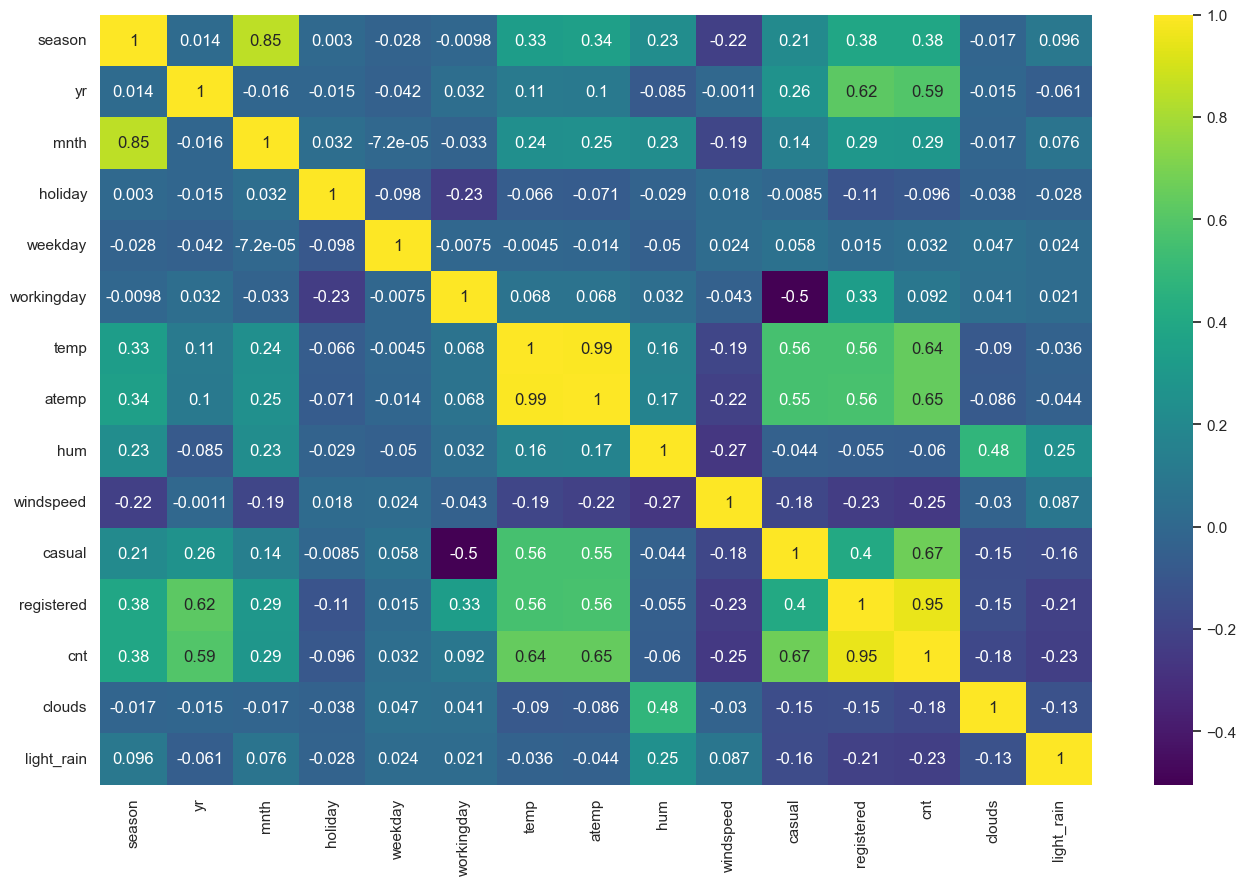

In [32]:
# checking the correlation between the different variables

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap = 'viridis')
plt.show()

As evident from the above heatmap there is a strong correlation between the 'cnt' target variable and the felt temperature 'atemp'

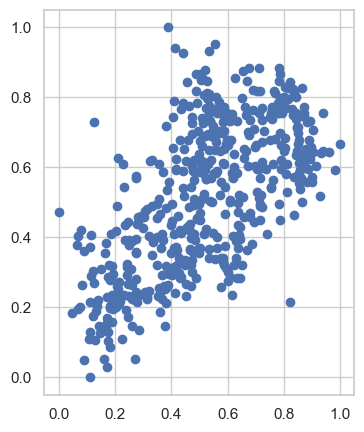

In [33]:
# plotting scatter-plot between cnt and atemp
plt.figure(figsize = (4, 5))
plt.scatter(df_train.cnt, df_train.atemp)
plt.show()

Here a considerable correlation is evident and visible.

### Building the model using RFE

In [34]:
# specifying the target and the predictor variables

y_train = df_train.pop('cnt') # target
X_train = df_train

The selection of the variables will be done using RFE and then further tuning will be done manually.

In [35]:
# Importing RFE and linearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [36]:
# Running RFE with output number of variables equal to 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [37]:
# listing the ranking obtained after RFE for all the columns of the dataset

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('season', True, 1),
 ('yr', True, 1),
 ('mnth', True, 1),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', False, 2),
 ('temp', False, 5),
 ('atemp', True, 1),
 ('hum', False, 4),
 ('windspeed', False, 3),
 ('casual', True, 1),
 ('registered', True, 1),
 ('clouds', True, 1),
 ('light_rain', True, 1)]

In [38]:
# making a list of the significant variables as per RFE

sig_cols = X_train.columns[rfe.support_]
sig_cols

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'atemp', 'casual',
       'registered', 'clouds', 'light_rain'],
      dtype='object')

**The above are the 10 predictor variables which have been selected by the RFE algorithm from the total eligible 14 coloumns**

### Building the model
After feature selection, the next step is the building of the linear regression model using the selected columns and then further analysis will be done using VIF and p-values to streamline and further reduce the number of dependent variables. 

In [39]:
# Preparing the X_train dataframe using the selected columns obtained after RFE

X_train_rfe = X_train[sig_cols]  # sig_cols --> significant columns obtained from RFE (10 numbers)

In [40]:
# importing stats models
import statsmodels.api as sm
# Adding a constant variable - One of the main requirement of statsmodels
X_train_rfe = sm.add_constant(X_train_rfe)

In [41]:
# Running the linear model

lm = sm.OLS(y_train, X_train_rfe).fit()

In [42]:
# Viewing the summary of the generated model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.548e+30
Date:                Wed, 04 Sep 2024   Prob (F-statistic):               0.00
Time:                        23:41:01   Log-Likelihood:                 16979.
No. Observations:                 510   AIC:                        -3.394e+04
Df Residuals:                     499   BIC:                        -3.389e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.498e-16   1.37e-16      1.818      0.0

From the above it is clear that the p-values of the following variables are very high:
    
    1. season
    2. yr
    3. holiday
    4. light_rain
    5. mnth
    6. clouds
    
The next step in determining which variables to drop will be first calculate the VIF (Variance Inflation Factor) for
each of the predictor variables as it will signal the multicollinearity between the predictor variables

In [43]:
# dropping the constant from the X_train to calculate the multicollinearity
X_train_new = X_train_rfe.drop(['const'], axis = 1)

In [44]:
# calculating the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns # the columns (predictor variables)

# caluclating VIF for each of the predictor variables using list comprehension
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False) # sorting the VIF values from largest to smallest

vif

,Features,VIF
7,registered,23.63
5,atemp,14.86
2,mnth,12.31
0,season,11.84
1,yr,5.01
6,casual,4.30
4,weekday,2.86
8,clouds,1.59
9,light_rain,1.28
3,holiday,1.05


Here, the registered variable is having high VIF while p-value is low
Next atemp is having high VIF value and >0.05 p-value.

The decrease in VIF and increase in p-value for mnth is nominal.

Hence, it becomes suitable to first remove atemp and then again check the data

In [45]:
# dropping the variable 'mnth' from the data
sig_cols = sig_cols.drop('atemp')

# preparing the X_train data-frame
X_train_rfe = X_train[sig_cols]

# importing stats models
import statsmodels.api as sm

# Adding a constant variable - One of the main requirement of statsmodels
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train, X_train_rfe).fit()

# Viewing the summary of the generated model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.313e+30
Date:                Wed, 04 Sep 2024   Prob (F-statistic):               0.00
Time:                        23:41:01   Log-Likelihood:                 16698.
No. Observations:                 510   AIC:                        -3.338e+04
Df Residuals:                     500   BIC:                        -3.333e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.904e-16   2.27e-16      3.038      0.0

Re-calculating the VIF values for the columns

In [46]:
# dropping the constant from the X_train to calculate the multicollinearity
X_train_new = X_train_rfe.drop(['const'], axis = 1)

# calculating the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns # the columns (predictor variables)

# caluclating VIF for each of the predictor variables using list comprehension
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False) # sorting the VIF values from largest to smallest

vif

,Features,VIF
2,mnth,12.25
0,season,11.73
6,registered,11.55
1,yr,3.82
5,casual,3.09
4,weekday,2.86
7,clouds,1.47
8,light_rain,1.15
3,holiday,1.04


In [47]:
sig_cols.drop('mnth')

Index(['season', 'yr', 'holiday', 'weekday', 'casual', 'registered', 'clouds',
       'light_rain'],
      dtype='object')

The next suitable variable to remove and test is **mnth** due to very high VIF

In [48]:
# dropping the variable 'mnth' from the data
sig_cols = sig_cols.drop('mnth')

# preparing the X_train data-frame
X_train_rfe = X_train[sig_cols]

# importing stats models
import statsmodels.api as sm

# Adding a constant variable - One of the main requirement of statsmodels
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train, X_train_rfe).fit()

# Viewing the summary of the generated model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.668e+30
Date:                Wed, 04 Sep 2024   Prob (F-statistic):               0.00
Time:                        23:41:01   Log-Likelihood:                 16849.
No. Observations:                 510   AIC:                        -3.368e+04
Df Residuals:                     501   BIC:                        -3.364e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.908e-16   1.63e-16      1.173      0.2

In [49]:
# dropping the constant from the X_train to calculate the multicollinearity
X_train_new = X_train_rfe.drop(['const'], axis = 1)

# calculating the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns # the columns (predictor variables)

# caluclating VIF for each of the predictor variables using list comprehension
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False) # sorting the VIF values from largest to smallest

vif

,Features,VIF
5,registered,11.31
0,season,4.14
1,yr,3.81
4,casual,3.09
3,weekday,2.77
6,clouds,1.46
7,light_rain,1.14
2,holiday,1.03


With a VIF value above 10, registered will have to be dropped.

In [50]:
# dropping the variable 'mnth' from the data
sig_cols = sig_cols.drop('registered')

# preparing the X_train data-frame
X_train_rfe = X_train[sig_cols]

# importing stats models
import statsmodels.api as sm

# Adding a constant variable - One of the main requirement of statsmodels
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train, X_train_rfe).fit()

# Viewing the summary of the generated model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     220.6
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          1.06e-148
Time:                        23:41:01   Log-Likelihood:                 396.78
No. Observations:                 510   AIC:                            -777.6
Df Residuals:                     502   BIC:                            -743.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2127      0.014     15.593      0.0

In [51]:
# dropping the constant from the X_train to calculate the multicollinearity
X_train_new = X_train_rfe.drop(['const'], axis = 1)

# calculating the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns # the columns (predictor variables)

# caluclating VIF for each of the predictor variables using list comprehension
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False) # sorting the VIF values from largest to smallest

vif

,Features,VIF
4,casual,2.81
0,season,2.53
3,weekday,2.34
1,yr,1.98
5,clouds,1.46
6,light_rain,1.09
2,holiday,1.02


The VIFs are well within the ideal range

max(VIF) = 2.81 < 5

In [52]:
# dropping the variable 'mnth' from the data
sig_cols = sig_cols.drop('weekday')

# preparing the X_train data-frame
X_train_rfe = X_train[sig_cols]

# importing stats models
import statsmodels.api as sm

# Adding a constant variable - One of the main requirement of statsmodels
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train, X_train_rfe).fit()

# Viewing the summary of the generated model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     256.1
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          2.25e-149
Time:                        23:41:01   Log-Likelihood:                 395.49
No. Observations:                 510   AIC:                            -777.0
Df Residuals:                     503   BIC:                            -747.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2243      0.012     19.459      0.0

In [53]:
# dropping the constant from the X_train to calculate the multicollinearity
X_train_new = X_train_rfe.drop(['const'], axis = 1)

# calculating the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns # the columns (predictor variables)

# caluclating VIF for each of the predictor variables using list comprehension
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False) # sorting the VIF values from largest to smallest

vif

,Features,VIF
3,casual,2.55
0,season,2.40
1,yr,1.95
4,clouds,1.34
5,light_rain,1.07
2,holiday,1.02


Another removal of the weekday was required to ensure that the p-values were well within the range and no insignifcant
predictor variable is kept

## Residual Analysis of the train_data

In [54]:
y_train_cnt = lm.predict(X_train_rfe)

# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

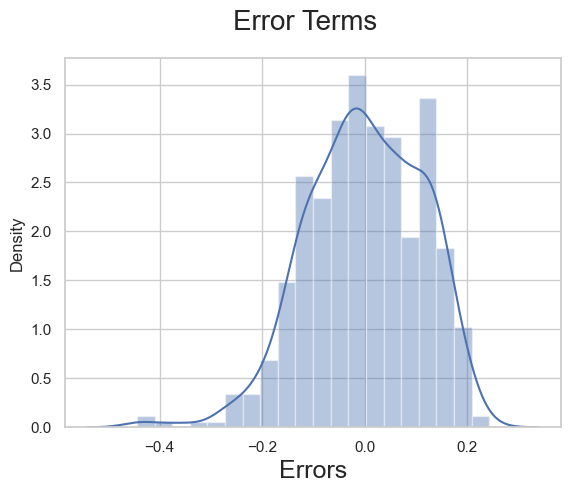

In [55]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

The residual curve is somewhat normally distributed and centered near at 0

## Making Predictions

### Applying the scaling on the test data sets

The first step is to scale the test data set in the same way as that of the train data

In [56]:
num_vars = ['season', 'mnth', 'weekday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars]) # using no fitting

### Dividing into X-test and y-test

In [57]:
y_test = df_test.pop('cnt')
X_test = df_test

In [58]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [59]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

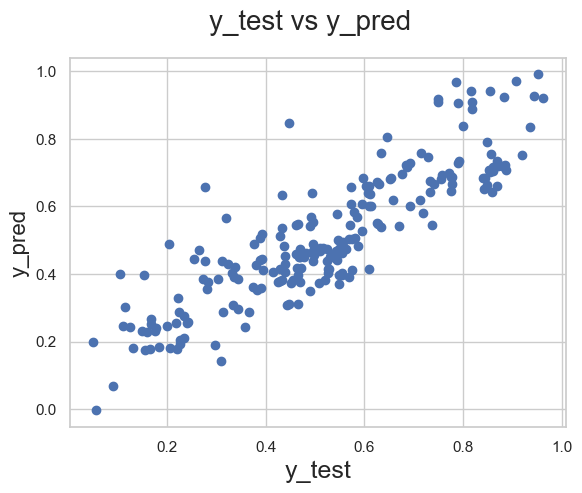

In [60]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [61]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7506168467578035